Olá Gerson

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Descrição do Projeto

Você está trabalhando como analista da Zuber, uma nova empresa de compartilhamento de caronas que está sendo lançada em Chicago. Sua tarefa é encontrar padrões nas informações disponíveis. Você quer entender as preferências dos passageiros e o impacto de fatores externos nas corridas.

***

<div class="alert alert-block alert-info">
<b>Caro Revisor, caso não haja necessidade de apresentar a parte do webscrapping e das consultas em bd, peço que ignore até o
capitulo 3.</b> <a class="tocSkip"></a>
</div>


##  Analise dos dados (webscrapping)

###  Escreva um código para analisar os dados sobre o clima em Chicago em novembro de 2017 no site:

```python
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html"

# Metodo 1
# O metodo read_html identifica os elementos table das paginas html então só preciso depois indicar qual tabela(indice) quero
# Para este caso > 0 Primeira e unica tabela da pagina
#weather_records = pd.read_html(url)[0]
#print(weather_records)

# Metodo 2
req = requests.get(url)  # Requisição GET
soup = BeautifulSoup(req.text, 'lxml')

colunas = []
for row in soup.find_all('th'):
    colunas.append(row.text)

linhas = []  # a lista na qual serão armazenados os dados da tabela

for row in soup.find_all('tr'):
    if not row.find_all('th'): # Precisamos desta condição para ignorar a primeira linha da tabela que contém os cabeçalhos
        linhas.append([element.text for element in row.find_all('td')])


weather_records = pd.DataFrame(linhas, columns=colunas)
print(weather_records)
```

***

## Consultas a base de dados (sql)
### Imprima o campo company_name. Encontre o número de corridas de táxi para cada empresa de táxi de 15 a 16 de novembro de 2017, nomeie o campo resultante como trips_amount e imprima-o também. 

Classifique os resultados pelo campo trips_amount em ordem decrescente.
```sql
select c.company_name, count(t.trip_id) as trips_amount
from cabs c inner join trips t on c.cab_id = t.cab_id 
where t.start_ts::date BETWEEN '2017-11-15' and '2017-11-16' 
group by c.company_name
order by trips_amount desc;
```
### Encontre o número de corridas para cada empresa de táxi cujo nome contém as palavras "Amarelo" ou "Azul" de 1 a 7 de novembro de 2017. 

Nomeie a variável resultante como trips_amount. 

Agrupe os resultados pelo campo company_name.
```sql
select c.company_name, count(t.trip_id) as trips_amount
from cabs c inner join trips t on c.cab_id = t.cab_id 
where 
    t.start_ts::date BETWEEN '2017-11-01' and '2017-11-07'
    and ( c.company_name like '%Yellow%' or c.company_name like '%Blue%') 
group by c.company_name
order by trips_amount desc;
```
### De 1 a 7 de novembro de 2017, as empresas de táxi mais populares foram Flash Cab e Taxi Affiliation Services. 

Flash Cab	64084  
Taxi Affiliation Services	37583

Encontre o número de corridas para essas duas empresas e nomeie a variável resultante como trips_amount. 

Junte as corridas de todas as outras empresas no grupo "Outros". 

Agrupe os dados por nomes de empresas de táxi. 

Nomeie o campo com os nomes das empresas de táxi company. 

Ordene o resultado em ordem decrescente por trips_amount.
```sql
select 
    CASE
        WHEN c.company_name NOT IN ('Flash Cab','Taxi Affiliation Services')
        THEN 'Other'
    ELSE c.company_name
    END 
    as company,
    count(t.trip_id) as trips_amount
from cabs c inner join trips t on c.cab_id = t.cab_id 
where t.start_ts::date BETWEEN '2017-11-01' and '2017-11-07'
group by company
order by trips_amount desc;
```
### Recupere os identificadores dos bairros O'Hare e Loop da tabela neighborhoods.
```sql
select * from neighborhoods;
```
### Para cada hora, recupere os registros de condições climáticas da tabela weather_records. 

Usando o operador CASE, divida todas as horas em dois grupos: 

Bad se o campo descrição contiver as palavras rain ou storm e   
Good para outros. 

Nomeie o campo resultante como weather_conditions. 

A tabela final deve incluir dois campos: data e hora (ts) e weather_conditions.
```sql
SELECT ts,
CASE
    WHEN w.description LIKE ('%rain%') OR  w.description LIKE ('%storm%') THEN 'Bad'
    ELSE 'Good' END AS weather_conditions
FROM weather_records w;
```
### Recupere da tabela trips todas as corridas que começaram no Loop (pickup_location_id: 50) em um sábado e terminaram em O'Hare (dropoff_location_id: 63). 

Obtenha as condições meteorológicas para cada corrida. Use o método que você aplicou na tarefa anterior. 

Além disso, recupere a duração de cada corrida. Ignore corridas para as quais os dados sobre as condições meteorológicas não estão disponíveis.

As colunas da tabela devem estar na seguinte ordem:
start_ts
weather_conditions
duration_seconds
Ordene por trip_id.
```sql
select t.start_ts, 
CASE
    WHEN w.description like ('%rain%') or  w.description like ('%storm%') THEN 'Bad'
    ELSE 'Good' END as weather_conditions,
    t.duration_seconds
from trips t
inner join weather_records w on w.ts = t.start_ts
where t.pickup_location_id = 50 and t.dropoff_location_id = 63 and EXTRACT( DOW from t.start_ts ) = 6
order by t.trip_id;
```


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = "https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html"

# Metodo 1
# O metodo read_html identifica os elementos table das paginas html então só preciso depois indicar qual tabela(indice) quero
# Para este caso > 0 Primeira e unica tabela da pagina
#weather_records = pd.read_html(url)[0]
#print(weather_records)

# Metodo 2
req = requests.get(url)  # Requisição GET
soup = BeautifulSoup(req.text, 'lxml')

colunas = []
for row in soup.find_all('th'):
    colunas.append(row.text)

linhas = []  # a lista na qual serão armazenados os dados da tabela

# for row in soup.find_all('tr'):
#      if not row.find_all('th'): # Precisamos desta condição para ignorar a primeira linha da tabela que contém os cabeçalhos
#         linhas.append([element.text for element in row.find_all('td')])

for row in soup.find_all('tr')[1:]: # Ignorar a primeira linha(indice 0) para evitar o th (table header)
        linhas.append([element.text for element in row.find_all('td')])


weather_records = pd.DataFrame(linhas, columns=colunas)
print(weather_records)


           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não consegui achar erros no SQL (mas também não tenho como executar). Porém, sugestão de melhoria no código de scraping: Em vez de executar o loop com if not row.find_all('th'), sugiro iterar soup.find_all('tr')[1:] assim pulamos a primeira entrada que contém th 
</div>

<div class="alert alert-block alert-info">
<b>Obrigado pela dica :)
</b> <a class="tocSkip"></a>
</div>

# Processamento dos dados em python

***

## Importar bibliotecas

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings

print('Bibliotecas importadas!')

Bibliotecas importadas!


In [3]:
cor = "#2ab0ff"
cor2 = "#1071b2"

warnings.filterwarnings('ignore') # Ignorar aviso de alguns metodos prestes a depreciar :( . 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

***
## Carregar os conjuntos de dados

In [4]:
dfr1 = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')

dfr4 = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Temos os seguintes campos para os dataframes carregados:

- project_sql_result_01.csv

**trips_amount**: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

- project_sql_result_04.csv  

**dropoff_location_name**: bairros de Chicago onde as corridas terminaram  
**average_trips**: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

### Verificação dos dados carregados

#### Amostra

In [5]:
display(dfr1.sample(5))
display(dfr4.sample(5))

,company_name,trips_amount
53,5006 - 39261 Salifu Bawa,14
22,Chicago Independents,1296
31,American United Taxi Affiliation,210
47,4615 - 83503 Tyrone Henderson,21
60,2733 - 74600 Benny Jona,7


,dropoff_location_name,average_trips
85,Montclare,5.766667
67,Auburn Gresham,15.166667
23,Rogers Park,299.033333
44,Belmont Cragin,59.033333
64,Oakland,16.633333


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Total de linhas e colunas para os dataframes

In [6]:
print("dfr1: ",dfr1.shape)
print("dfr4: ",dfr4.shape)

dfr1:  (64, 2)
dfr4:  (94, 2)


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Verificação de valores ausentes

In [7]:
dfr1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [8]:
dfr4.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Sem valores ausentes nos 2 datasets

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Informações gerais

In [9]:
print("dfr1:\n")
print(dfr1.info())
print('\n')
print("dfr4:\n")
print(dfr4.info())

dfr1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


dfr4:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Dados das estatisticas iniciais

In [10]:
print("dfr1:")
display(dfr1.describe())
print("dfr4:")
display(dfr4.describe())

dfr1:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


dfr4:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Tipos de dados

In [11]:
print("dfr1:\n")
print(dfr1.dtypes)
print("\ndfr4:\n")
print(dfr4.dtypes)

dfr1:

company_name    object
trips_amount     int64
dtype: object

dfr4:

dropoff_location_name     object
average_trips            float64
dtype: object


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Funcoes auxiliares

In [12]:
def obter_cores(coluna : pd.Series = None, corNormal:str='gray', corDestaque:str='#1071b2' ):
    
    cores = [corNormal if (x < np.max(coluna)) else corDestaque for x in coluna] 
    return cores

In [13]:
def barplot(df_tmp, xcol, ycol, xlabel, ylabel, title):
    
    cores = obter_cores ( df_tmp[ycol], 'gray', cor )

    df_tmp.plot.barh(x=xcol, y=ycol, rot=0, color=cores, legend=False, figsize=(18,9))
    plt.ylabel('')
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16, rotation=0)
    plt.grid(axis = 'y')

    plt.xlabel(xlabel, color=cor, fontweight='bold', fontsize='20')

    plt.text(df_tmp[ycol].min(),  df_tmp.index.max() + 1 , ylabel, fontsize=24, color=cor, fontweight='bold')

    plt.text( df_tmp[ycol].max() * 1.02, (df_tmp[ycol].idxmax()) - .15 , \
                    round ( df_tmp[ycol].max(),2), color = 'white', fontsize='20', \
                    ha = 'left', Bbox = dict(facecolor = '#2ab0ff', alpha = 1, edgecolor='#ffffff', boxstyle='round,pad=.3') )

    sns.despine(left=True)

### 10 principais bairros em termos de destinos

A primeira tarefa para esta analise consiste em encontrar e apresentar os 10 prinicpais bairros em termos de destinos.

Segue abaixo:

In [14]:
princ_bairros = dfr4.loc [ dfr4.index.isin( dfr4.average_trips.nlargest(10).index.tolist()) ]
princ_bairros

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Não conhecia este método nlargest. Muito legal. Parabéns. Também aprendemos revisando projetos
</div>

#### Visualizacao

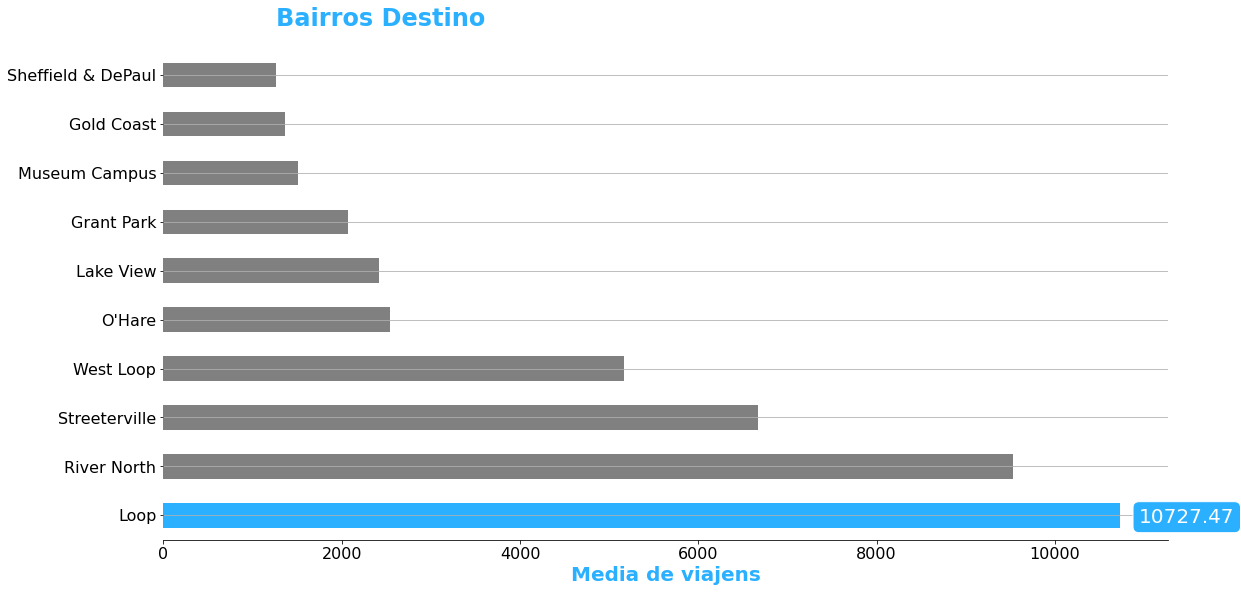

In [15]:
#princ_bairros.plot(kind ='barh', x='dropoff_location_name', y='average_trips')
#plt.show()
#dfr4.average_trips.hist()
#plt.show()

barplot(princ_bairros, 'dropoff_location_name','average_trips', 'Media de viajens','Bairros Destino','c')
plt.show()

# print('\n')
# dfr4.average_trips.hist(color=cor, figsize=(15,6), rwidth = 0.9, edgecolor='#ffffff', linewidth=1)
# plt.title('Distribuicao media das viagens', fontsize=20, fontweight='bold', color=cor, ha='left')
# sns.despine()
# plt.xlabel('Duracao', fontsize=20, fontweight='bold', color=cor)
# plt.ylabel('Total de registos', fontsize=20, fontweight='bold', color=cor)
# plt.show()

Como destacado no grafico acima o bairro que tem maior media de viagens é o **<font color='blue'>Loop</font>** e o destino menos visitado é `Sheffield & DePaul`

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### 10 principais empresas de taxi

In [16]:
princ_taxicomp = dfr1.loc [ dfr1.index.isin( dfr1.trips_amount.nlargest(10).index.tolist()) ]
princ_taxicomp

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Visualizacao

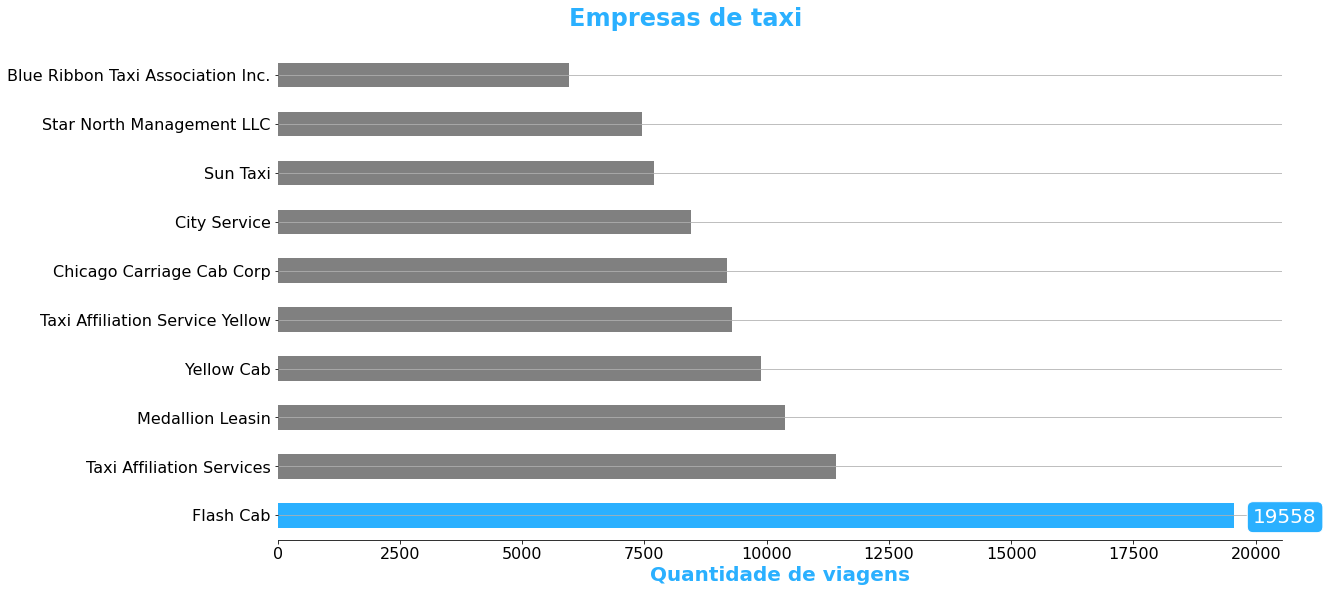

In [17]:
barplot(princ_taxicomp, 'company_name','trips_amount', 'Quantidade de viagens','Empresas de taxi','c')
plt.show()

# print('\n')
# dfr1.trips_amount.hist(color=cor, figsize=(15,6), rwidth = 0.9, edgecolor='#ffffff', linewidth=1)
# plt.title('Distribuicao', fontsize=20, fontweight='bold', color=cor, ha='left')
# sns.despine()
# plt.xlabel('viagens', fontsize=20, fontweight='bold', color=cor)
# plt.ylabel('Total de registos', fontsize=20, fontweight='bold', color=cor)
# plt.show()

A empresa de taxis que tem dominado o mercado em quantidade de viagens é a **<font color='blue'>Flash Cab</font>**

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Hipoteses

Em sequencia a esta analise iremos tetar uma hipótese sobre o impacto do clima na frequência das viagens.

O conjunto de dados que será usado para esta verificação faz-se presente no ficheiro : `project_sql_result_07.csv` que é resultado das nossa consulta anterior na base de dados.

Carregamento do dataset.

In [18]:
df = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Amostra

In [19]:
df.sample(5)

,start_ts,weather_conditions,duration_seconds
595,2017-11-04 12:00:00,Good,3420.0
647,2017-11-25 23:00:00,Good,1500.0
527,2017-11-18 05:00:00,Good,1977.0
542,2017-11-18 11:00:00,Good,1980.0
714,2017-11-11 12:00:00,Good,1747.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Verificação dos tipos de dados

In [20]:
df.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

Verificação de valores ausentes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [21]:
df.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Sem valores ausentes no conjunto de dados

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Preparação dos dados

Pela amostra apresentada, notamos que a coluna `start_ts` contem registos de data hora, mas o tipo de dado esta como object.

Faremos uma conversão para datetime de modos a facilitar as possíveis operações com datas.

In [22]:
df['start_ts'] = pd.to_datetime(df.start_ts, format='%Y-%m-%d %H:%M:%S')
df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [23]:
df.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Iremos de seguida fazer mais uma verificação no dataframe para determinarmos os dias de semana que temos. 

In [24]:
df['weekday_name'] = df['start_ts'].dt.day_name()

df.weekday_name.value_counts()

Saturday    1068
Name: weekday_name, dtype: int64

Apenas temos sabado.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Visualização da distribuição pela condicao climatica

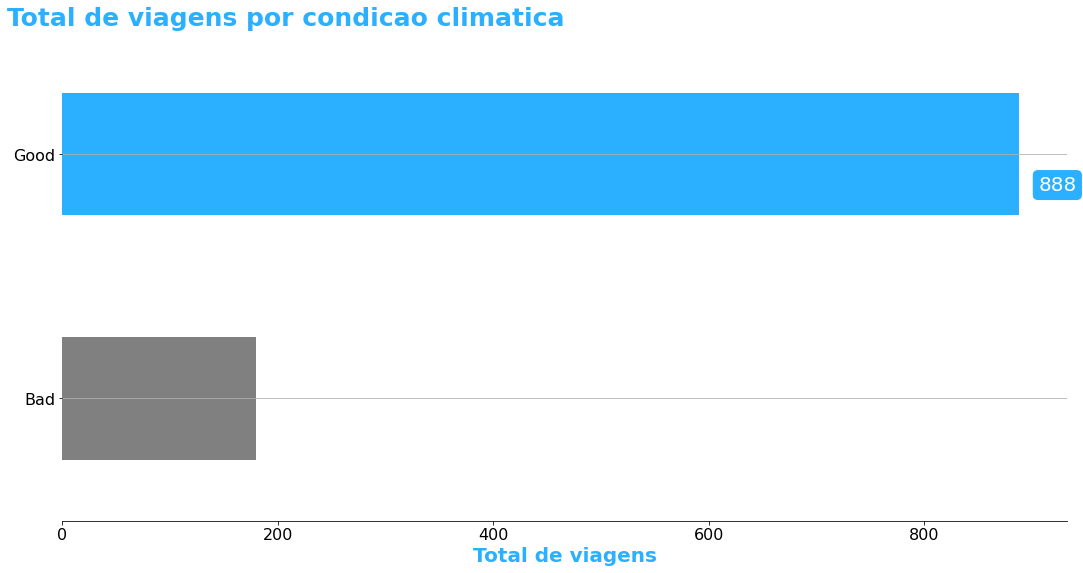

In [25]:
df_groupweather = df.groupby('weather_conditions').count()['start_ts']
#df_groupweather.plot(kind='barh')
#plt.show()
barplot(df_groupweather.reset_index(), 'weather_conditions','start_ts', 'Total de viagens','','')

plt.title('Total de viagens por condicao climatica', fontsize='25', color=cor, fontweight='bold', ha='right')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [26]:
df_groupweather

weather_conditions
Bad     180
Good    888
Name: start_ts, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Teste da hipotese

tendo como objectivo responder se a duracao media das viajens de Loop para o Aeroporte O'Hare muda nos sabados chuvosos. 

Declaramos as seguintes hipoteses nula e alternativa:

**hipótese nula H₀:** 
- "A duracao media das viajens de Loop para O'Hare nos sabados com bom clima e igual para os sabados com mau clima"


**hipótese alternativa H₁, é baseada em H₀. Para este H₀, H₁ sera:**
- "A duracao media das viajens de Loop para O'Hare nos sabados com bom clima e diferente para os sabados com mau clima"


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A formulação das hipóteses está incorreta. A hipótese nula assumimos a igualdade enquanto a hipótese alternativa é a negaçaõ da hipótese nula. Lembre-se sempre de um julgamento: hipótese nula é inocente. Aqui a mesma coisa, assumimos que a duração é igual (não há diferença). Peço que faça os ajustes.
</div>

<div class="alert alert-block alert-info">
<b>Muito obrigado caro Ramon, eu sempre ficava na dua sobre qual deve ser a igualdade, agora foi bastante claro.
Obrigado.
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Achei que tivesse alterado antes da segunda submissão, provavelmente o notebook não tenha gravado.
</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Sem problemas. O importante é que você compreendeu. Lembre-se: H0 é igualdade, não há diferença. H1 é a negação da H0 (em linhas gerais).
</div>

Para testar sua hipótese de que as médias de **dois conjuntos** são iguais com base nas amostras retiradas iremos aplicar o método:

`scipy.stats.ttest_ind`

Iremos considerar o limiar `alfa` em 0.05

Iremos separar dois conjuntos de dados, os registos com mau clima e os registos com bom clima.

Conjunto 1 : registos com mau clima   
Conjunto 2 : registos com bom clima

In [27]:
df_badweather = df.loc[ df.weather_conditions != 'Good' ]
df_goodweather = df.loc[ df.weather_conditions == 'Good' ]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Iremos olhar a distribuicao de valores para as duas amostras.

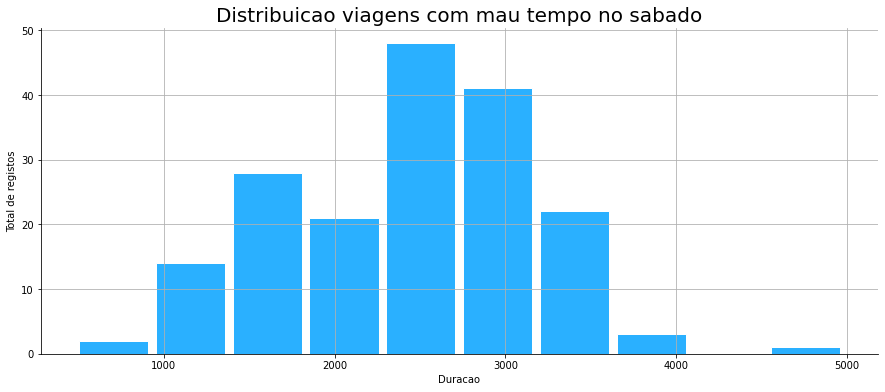

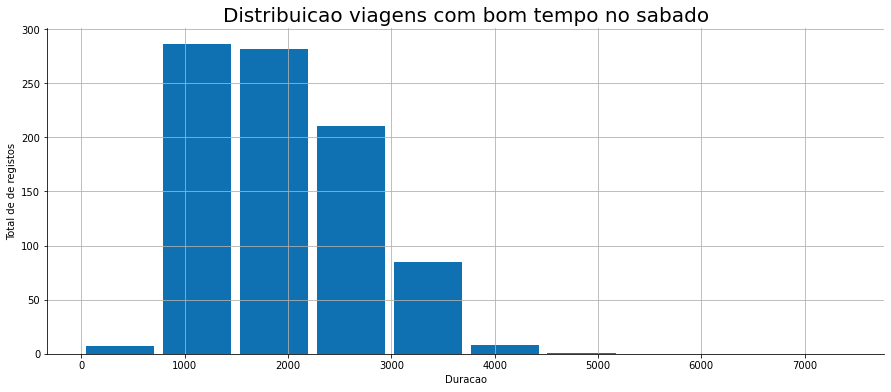

In [28]:
df_badweather.duration_seconds.hist(color=cor, figsize=(15,6), rwidth = 0.9, edgecolor='#ffffff', linewidth=1)
plt.title('Distribuicao viagens com mau tempo no sabado', fontsize=20)
sns.despine()
plt.xlabel('Duracao')
plt.ylabel('Total de registos')
plt.show()

df_goodweather.duration_seconds.hist(color=cor2, figsize=(15,6), rwidth = 0.9, edgecolor='#ffffff', linewidth=1)
plt.title('Distribuicao viagens com bom tempo no sabado', fontsize=20)
plt.xlabel('Duracao')
plt.ylabel('Total de de registos')
sns.despine()

plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Os registos com mau tempo no sabado apresentar uma distribuição mais proxima a normal

Enquanto que os registos com bom tempo apresentam uma distorção à direita onde a maior concentração de duração esta entre os 0 e 3000

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Variaveis estatisticas.

In [29]:
media1 = round( df_badweather.duration_seconds.mean() , 2)
media2 = round ( df_goodweather.duration_seconds.mean(), 2)

var1 = round ( np.var( df_badweather.duration_seconds ), 2)
var2 = round ( np.var( df_goodweather.duration_seconds ), 2)

std1 = round ( np.std( df_badweather.duration_seconds ), 2)
std2 = round ( np.std( df_goodweather.duration_seconds ), 2)

print('Sabados com mau clima, Media:', media1 )
print('Sabados com bom clima, Media:', media2 )
print('--')
print('Sabados com mau clima, Variancia:', var1 )
print('Sabados com bom clima, Variancia:', var2 )
print('--')
print('Sabados com mau clima, Desvio Padrão:', std1 )
print('Sabados com bom clima, Desvio Padrão:', std2 )

Sabados com mau clima, Media: 2427.21
Sabados com bom clima, Media: 1999.68
--
Sabados com mau clima, Variancia: 517403.56
Sabados com bom clima, Variancia: 575732.93
--
Sabados com mau clima, Desvio Padrão: 719.31
Sabados com bom clima, Desvio Padrão: 758.77


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

#### Resultado

As variancias nao sao aproximadamente iguais entao o parametro `equal_var` recebera o valor `False`

In [30]:
alpha = 0.05

results = st.ttest_ind(df_badweather.duration_seconds, df_badweather.duration_seconds, equal_var = False )

print('p-value: ', results.pvalue)

print('\nResultado da hipotese: ')
if results.pvalue < alpha:
    print("Hipótese nula sera rejeitada! ")
else:
    print("Não podemos rejeitar a hipótese nula! ")

p-value:  1.0

Resultado da hipotese: 
Não podemos rejeitar a hipótese nula! 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Conclusão

Uma vez concluida a nossa analise para a empresa Zuber com o objectivo de entender as preferências dos passageiros e o impacto dos factores climaticos nas viagens, partilhamos os nossos estudos feitos para o sabado:

- A empresa de taxis com mais corridas é a Flash Cab, com esta aprendizagem podemos incentivar algumas questões e perceber os motivos, pode ser que as outras empresas tenham menos colaboradores disponiveis nos sabado ou ainda alguma redução na carga horária nos finais de semana.


- Há menos registos de sabados com mau clima em comparação a sabados com bom clima 180 vs 888, para esta informação resta-nos apurar se ao longo dos anos Julho tem sido de facto o mês com a o clima de chuva mais predominante.


- Os destinos mais solicitados pelos passageiros são:  
1º Loop  
2º River North  
3º Steeterville  
Por agora, uma das possiveis acções podemos tirar desta observação:   
1º - Validar a real demanda nas outras regiões de modos a limitar ou aumentar a disponibilidade dos taxis 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>



> Obrigado,
<font color='blue'>Gerson Barroso.</font>


<s><div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Corrigir a formulação das hipóteses nula e alternativa </span>


Portanto, sugiro que você corrija os pontos indicados. Caso você tenha alguma dúvida, não hesite em me contactar.
    
Bom trabalho.
</div>



<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Você finalizou mais um projeto. Parabéns. Desejo sucesso na jornada.
    
</div>
